In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Doc du lieu
data = pd.read_csv('https://raw.githubusercontent.com/hipdz21/BTL_CDHTTT_DuDoanNhietDo/main/data/weatherHistory.csv')
data_end = int(np.floor(0.8*(data.shape[0])))
dataset = data.iloc[:, 3:4].values
training_set = dataset[:data_end]
testing_set = dataset[data_end:]

In [ ]:
# Thuc hien scale du lieu gia ve khoang 0,1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# Tao du lieu train, X = 24 time steps, Y =  1 time step
X_train = []
y_train = []
no_of_sample = len(training_set)

for i in range(24, no_of_sample):
    X_train.append(training_set_scaled[i-24:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
# Xay dung model LSTM
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')



In [ ]:
# training
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)
# regressor.save("mymodel.h5")



Epoch 1/10
2411/2411 [==============================] - 38s 12ms/step - loss: 0.0054
Epoch 2/10
2411/2411 [==============================] - 31s 13ms/step - loss: 0.0014
Epoch 3/10
2411/2411 [==============================] - 30s 12ms/step - loss: 9.6686e-04
Epoch 4/10
2411/2411 [==============================] - 29s 12ms/step - loss: 8.8200e-04
Epoch 5/10
2411/2411 [==============================] - 30s 12ms/step - loss: 8.4213e-04
Epoch 6/10
2411/2411 [==============================] - 28s 12ms/step - loss: 8.1848e-04
Epoch 7/10
2411/2411 [==============================] - 28s 12ms/step - loss: 7.9926e-04
Epoch 8/10
2411/2411 [==============================] - 29s 12ms/step - loss: 7.7755e-04
Epoch 9/10
2411/2411 [==============================] - 29s 12ms/step - loss: 7.5884e-04
Epoch 10/10
2411/2411 [==============================] - 28s 12ms/step - loss: 7.4468e-04


# New Section

In [ ]:
# Tien hanh du doan
inputs = dataset[len(dataset) - len(testing_set) - 24:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
no_of_sample = len(inputs)

for i in range(24, no_of_sample):
    X_test.append(inputs[i-24:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

603/603 [==============================] - 5s 5ms/step


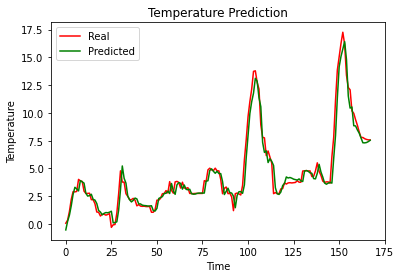

In [ ]:
# Ve bieu do gia that va gia du doan (1 tuan)
plt.plot(testing_set[:168], color = 'red', label = 'Real')
plt.plot(predicted[:168], color = 'green', label = 'Predicted')
plt.title('Temperature Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()